# AutoEncoders for Dimensionality Reduction

- <a href ='https://blog.keras.io/building-autoencoders-in-keras.html'>General Understanding for What is Auto Encoder ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Create a dummy dataset using `make_blobs`

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples = 300, 
                  n_features = 2, 
                  centers =2, 
                  cluster_std = 1.0, 
                  random_state = 101)

In [4]:
X, y = data

## Create noise, just for demo purpose

In [5]:
np.random.seed(seed=42)

z_noise = np.random.normal(size= len(X))
z_noise = pd.Series(z_noise)

In [6]:
z_noise

0      0.496714
1     -0.138264
2      0.647689
3      1.523030
4     -0.234153
         ...   
295   -0.692910
296    0.899600
297    0.307300
298    0.812862
299    0.629629
Length: 300, dtype: float64

In [7]:
feat = pd.DataFrame(X)

In [8]:
feat

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676
...,...,...
295,1.320546,2.605592
296,-8.043916,-6.010589
297,-9.733566,-7.460380
298,-10.722075,-5.568565


## Add Noise

In [9]:
feat = pd.concat([feat, z_noise], axis =1)

In [10]:
feat

,0,1,0
0,-8.877721,-6.760078,0.496714
1,0.630638,3.107075,-0.138264
2,-0.240609,2.820690,0.647689
3,-7.839091,-8.207545,1.523030
4,-10.972908,-7.390676,-0.234153
...,...,...,...
295,1.320546,2.605592,-0.692910
296,-8.043916,-6.010589,0.899600
297,-9.733566,-7.460380,0.307300
298,-10.722075,-5.568565,0.812862


In [11]:
feat.columns =['X1','X2','X3']

In [12]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,0.496714
1,0.630638,3.107075,-0.138264
2,-0.240609,2.820690,0.647689
3,-7.839091,-8.207545,1.523030
4,-10.972908,-7.390676,-0.234153


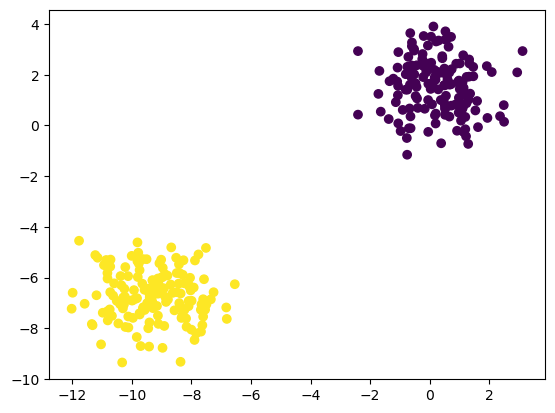

In [13]:
plt.scatter(feat['X1'],feat['X2'], c=y);

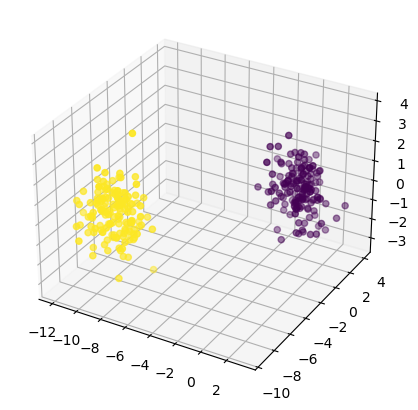

In [14]:
fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'], c=y);

-------
------
# <a> Encoder and Decoder

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## <a> Optimizer Stochastic Gradien Densent
    - allows to play with Learning rate, try to help out the autoencoder

In [16]:
from tensorflow.keras.optimizers import SGD

What we are going to do is

1. start off with 3 inputs
2. reduce it down to 2 layers
3. expand it back to 3 neurons

## <a>Encoder

In [17]:
# 3 ==> 2 ==> 3

In [18]:
# 3==2

encoder = Sequential()
encoder.add(Dense(units = 2, activation='relu', input_shape=[3])) # 3 features to 2 layers

## <a> Decoder

In [19]:
# 2==>3

decoder = Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape= [2])) # # getting 2 outputs of previous layer as input

## <a> AutoEncoder

In [20]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer= SGD(learning_rate = 1.5)) # # using stochastic gradient descent with learning rate of 1.5

## <a> Scaling data

Here we don't really split training, test etc unlike in supervised learning. The reason is we are trying to reduce the dimensionality and we don't really know what is gonna look like.

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler_feat = scaler.fit_transform(feat)

-----------
-------
## <a>Getting Reduced Dimensionality using `Encoder part`
    
## <a>Take note that prediction is performed by Encoder.

In [24]:
autoencoder.fit(scaler_feat, scaler_feat, epochs = 5)

Epoch 1/5
10/10 [==============================] - 1s 4ms/step - loss: 0.3138
Epoch 2/5
10/10 [==============================] - 0s 4ms/step - loss: 0.0617
Epoch 3/5
10/10 [==============================] - 0s 4ms/step - loss: 0.0221
Epoch 4/5
10/10 [==============================] - 0s 4ms/step - loss: 0.0124
Epoch 5/5
10/10 [==============================] - 0s 5ms/step - loss: 0.0134


In [25]:
encod_2dim = encoder.predict(scaler_feat)

10/10 [==============================] - 0s 3ms/step


In [26]:
encod_2dim

array([[0.7506243 , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.75851   , 0.        ],
       [0.8729503 , 0.        ],
       [0.84253657, 0.        ],
       [0.        , 0.        ],
       [0.88979316, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.7395045 , 0.        ],
       [0.8651087 , 0.        ],
       [0.        , 0.        ],
       [0.51323825, 0.        ],
       [0.        , 0.        ],
       [0.5654739 , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.96143204, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.6407386 , 0.        ],
       [0.884832  , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.7359409 , 0.        ],
       [0.8484186 , 0.        ],
       [0.

In [27]:
encod_2dim.shape

(300, 2)

## <a>Plotting the reduced dimensionality

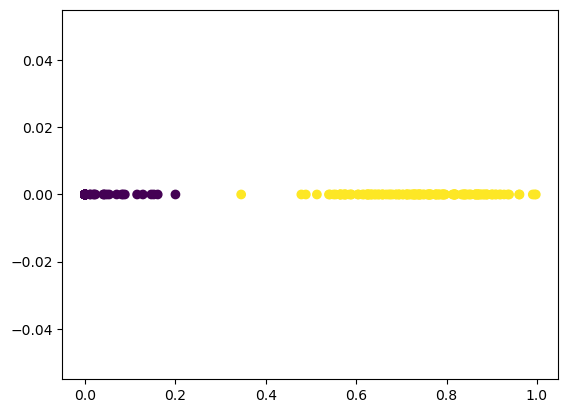

In [28]:
plt.scatter(encod_2dim[:,0], encod_2dim[:,1], c=y);

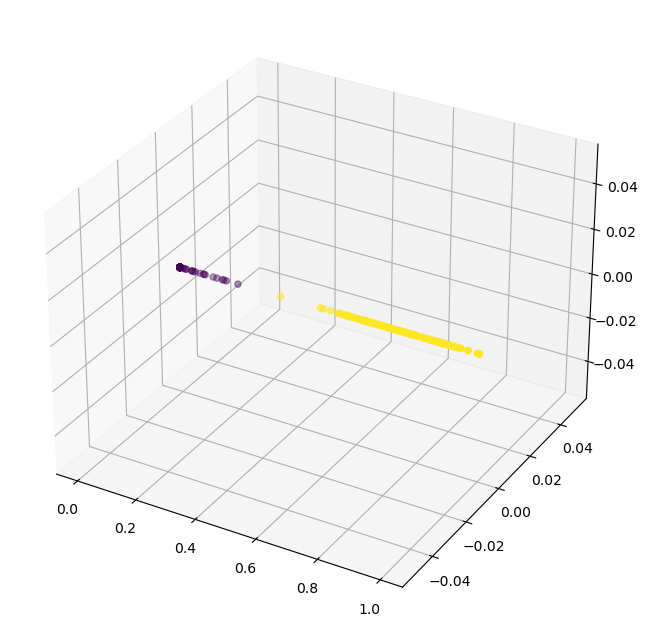

In [29]:
fig = plt.figure(figsize=(12,8), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encod_2dim[:,0], encod_2dim[:,1], c=y);